# ML: Assignment 3

## Libraries

### Installs & External

In [1]:
# !pip install tensorflow-macos nltk

### Imports

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.data_loading import DataLoader
from src.data_processing import Process

from src.next_word_model import NextWordModel

from src.prediction_evaluation import Evaluator

/Users/anton/.pyenv/versions/3.9.12/envs/machine_learning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /Users/anton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pipeline

### Data Loading & Processing

In [4]:
dl = DataLoader()
process = Process(
    dl,
    sample_factor = 0.95
)

In [5]:
X_train, X_test, y_train, y_test = process.process(force = True)

/Users/anton/Documents/University/Master/Semester_1/Machine_Learning/assignments/03/TUW-ML-3/src/data_processing.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["hasLink"] = df.text.str.contains(url_regex)


### Model Init & Training

In [6]:
model = NextWordModel(
    processor=process,
    load_existing=True
)

Loading existing model (model name = lstm.nextword.model) successful!


In [7]:
#model.train(X_train, y_train, epochs = 100)

In [8]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Model Evaluation

In [9]:
pred = model.predict("Republicans")
print(pred)

2023-02-25 14:35:35.918083: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


a


In [10]:
ev = Evaluator(model)

In [11]:
len(X_test)

107383

In [12]:
X_test = X_test[0:2500]
y_test = y_test[0:2500]

In [13]:
ev.evaluate(X_test, y_test, eval_type="id")

ERRORS:  0
Accuracy: 1.76%


1.76

In [14]:
ev.evaluate(X_test, y_test, eval_type="lemma")

Accuracy: 1.84%


1.84

In [15]:
acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding")

Accuracy: 21.12%


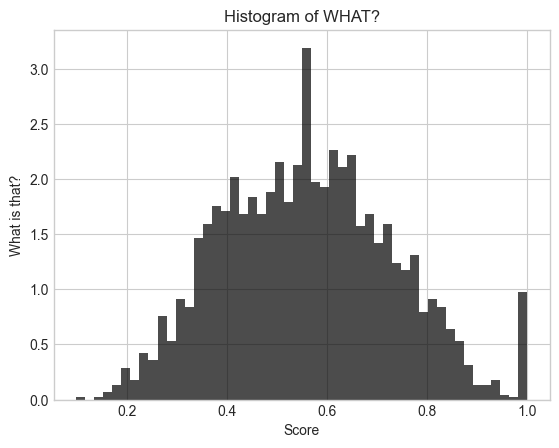

In [31]:
with plt.style.context("seaborn-whitegrid"):
    _, ax = plt.subplots()
    ax.hist(x=list(scores),
            bins=50,
            density=.5,
            alpha=.7,
            color="black")
    ax.set_xlabel("Score")
    ax.set_ylabel("What is that?")
    ax.set_title("Histogram of WHAT?")
    plt.show()

In [17]:
acc_list = []

for threshold in range(2, 10, 1):
    t = threshold/10
    acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding", threshold=t)
    acc_list.append({
        "accuracy": acc,
        "threshold": t
    })

Accuracy: 99.2%
Accuracy: 94.64%
Accuracy: 80.76%
Accuracy: 62.72%
Accuracy: 40.52%
Accuracy: 21.12%
Accuracy: 8.56%
Accuracy: 2.6%


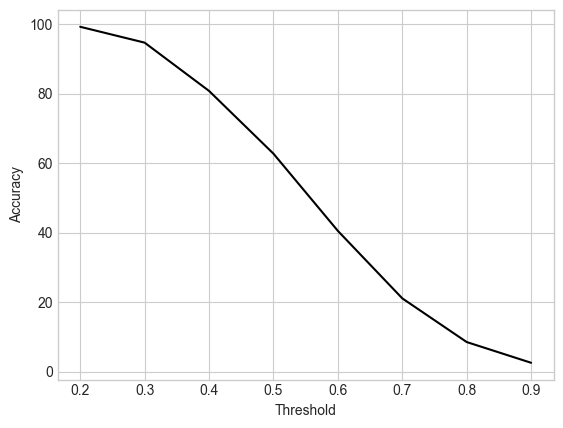

In [53]:
acc_emb_df = pd.DataFrame(acc_list)
with plt.style.context("seaborn-whitegrid"):
    _, ax = plt.subplots()
    acc_emb_df.plot(
        x = "threshold",
        y = "accuracy",
        ax=ax,
        legend=None,
        color="black"
    )
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Accuracy")
    ax.set_title("")
    plt.show()